In [1]:
import numpy as np
from safeable import *
from advisoryParams import *
from plotPolicy import *
from matplotlib2tikz import save as tikz_save # For saving to tikz for LaTex

%load_ext autoreload
%autoreload 2
%matplotlib inline

### Running Example

Feel free to change values and re-run everything

In [11]:
pra = SCL1500
ra = CL1500
pd = 0
eps= 3
v = [-30,-1]

advisory = advisoryParams(ra,pd=pd,eps=eps)

### Plot safeable boundaries

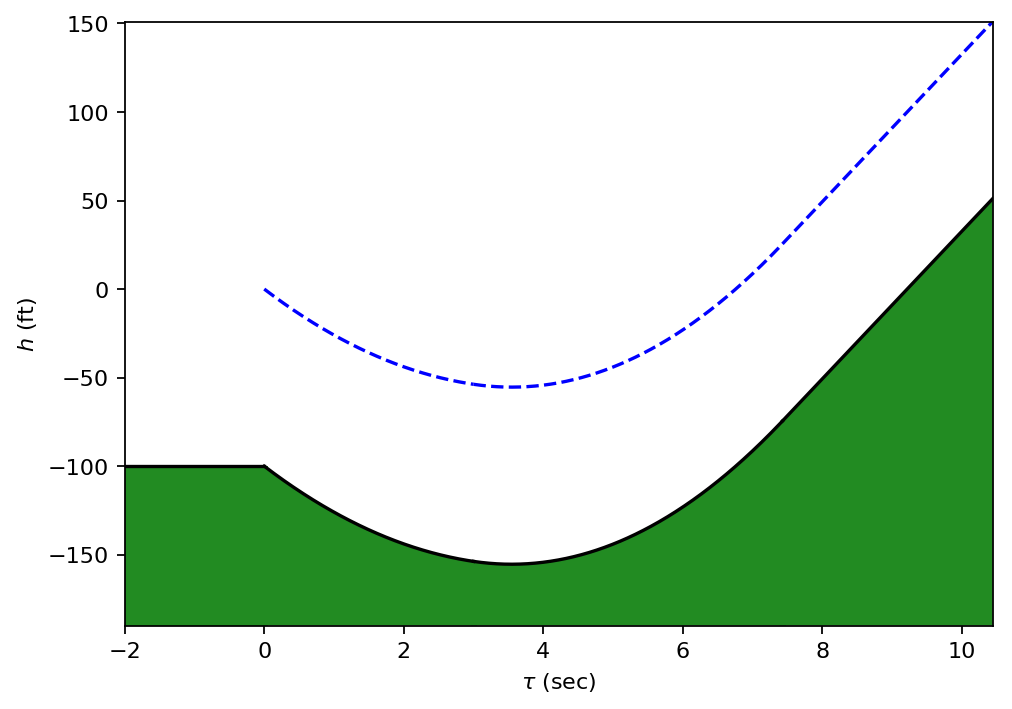

In [12]:
trajMin,trajMax,boundMin,boundMax = getSafeable(advisory,v,worstCase=False)
ax = plotBounds(boundMin,[],trajMin,[],withTraj=True,c='k',name="")

# Fill in safe region
i = 0
for line in ax.lines:
    
    # Get data from ax
    line_x = line.get_xdata()
    line_y = line.get_ydata()
    
    # Don't shade under nominal trajectory
    if line_y[0] == 0:
        break
     
    # Fill in gaps between sections, only after first section
    if i:
        ax.fill_between([X, line_x[5]], [Y, line_y[5]], np.linspace(-190, -190, 2), facecolor='forestgreen')

    # Shade under plot
    x_vals = np.linspace(line_x[0], line_x[-1], 500)
    y_vals = np.interp(x_vals, line_x, line_y)
    ax.fill_between(x_vals, y_vals, np.linspace(-190, -190, len(x_vals)), facecolor='forestgreen')
    
    # Store for filling gaps
    X = line_x[-5]
    Y = line_y[-5]
    i +=1

# Adjust limits for image of ownship
x_off = -2
xlim = ax.get_xlim()
plt.xlim(xlim[0]+x_off, xlim[-1])

line = ax.lines[0]
line = line.get_ydata()[0]
ax.fill_between(np.linspace(x_off, 0.05, 100), 
                np.linspace(line, line, 100),
                np.linspace(-190, -190, 100),
                facecolor='forestgreen')
ax.plot(np.linspace(x_off, 0, 100),
        np.linspace(line, line, 100), 'k-')
plt.autoscale(enable=True, axis='both',tight=True)


## Plot safeable boundaries

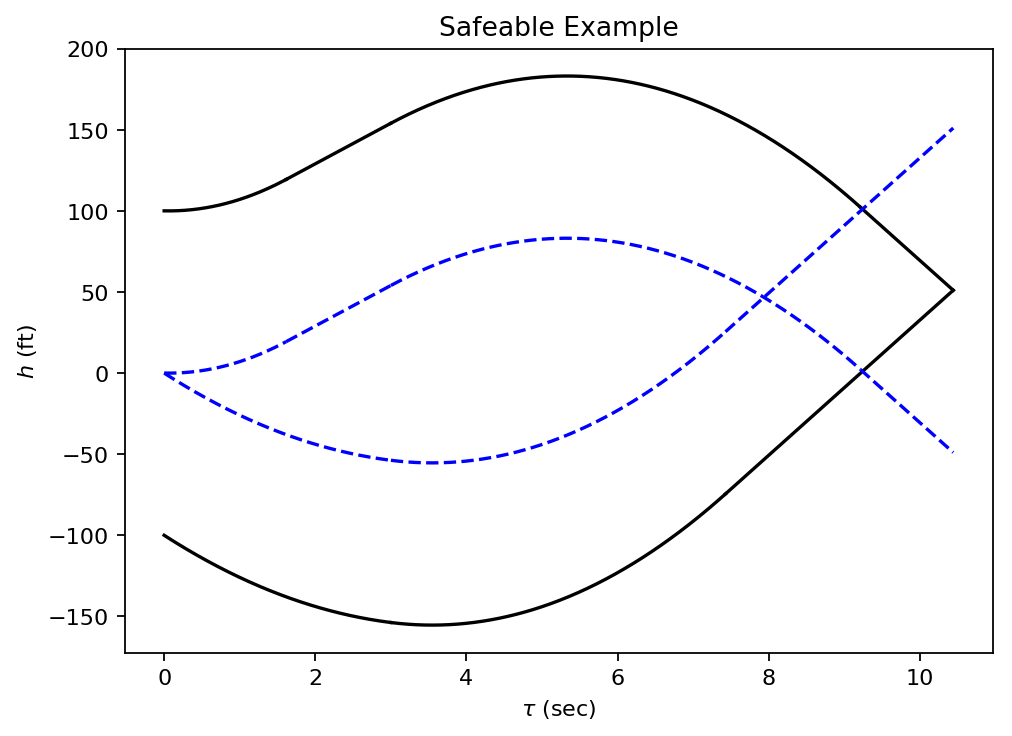

In [10]:
trajMin,trajMax,boundMin,boundMax = getSafeable(advisory,v,worstCase=False)
ax = plotBounds(boundMin,boundMax,trajMin,trajMax,withTraj=True,c='k',name="Safeable Example")

### Assume worst case tau

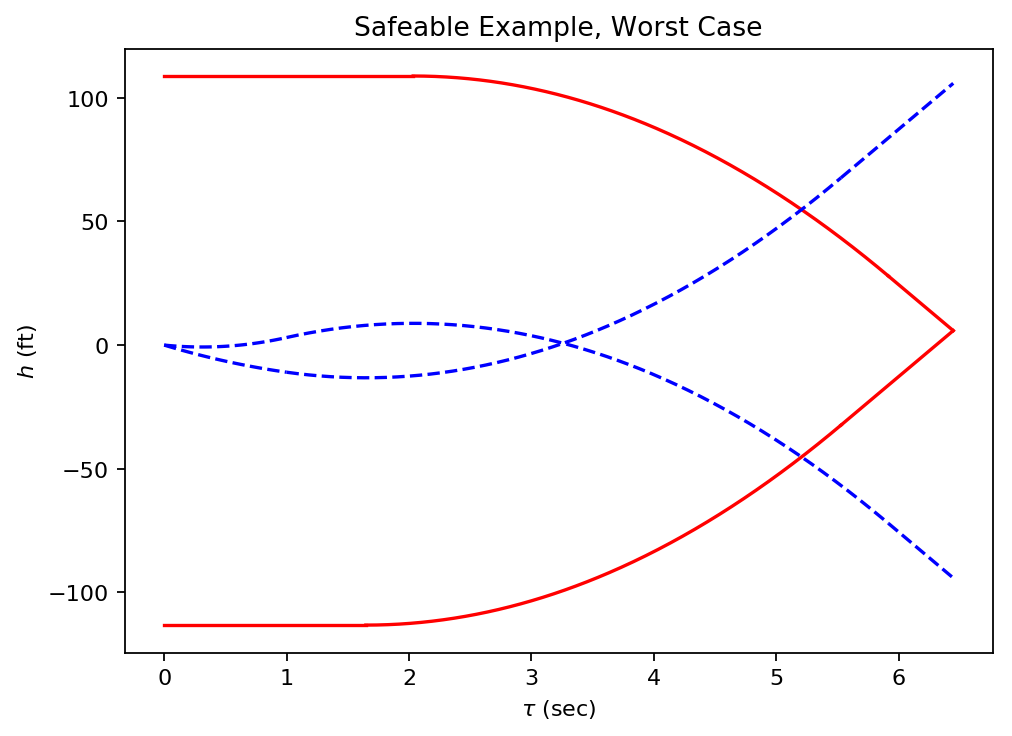

In [4]:
trajMin,trajMax,boundMin,boundMax = getSafeable(advisory,v,worstCase=True)  # worstCase is true by default
ax = plotBounds(boundMin,boundMax,trajMin,trajMax,withTraj=True, c='r', name="Safeable Example, Worst Case")

### Combine plots onto one axes

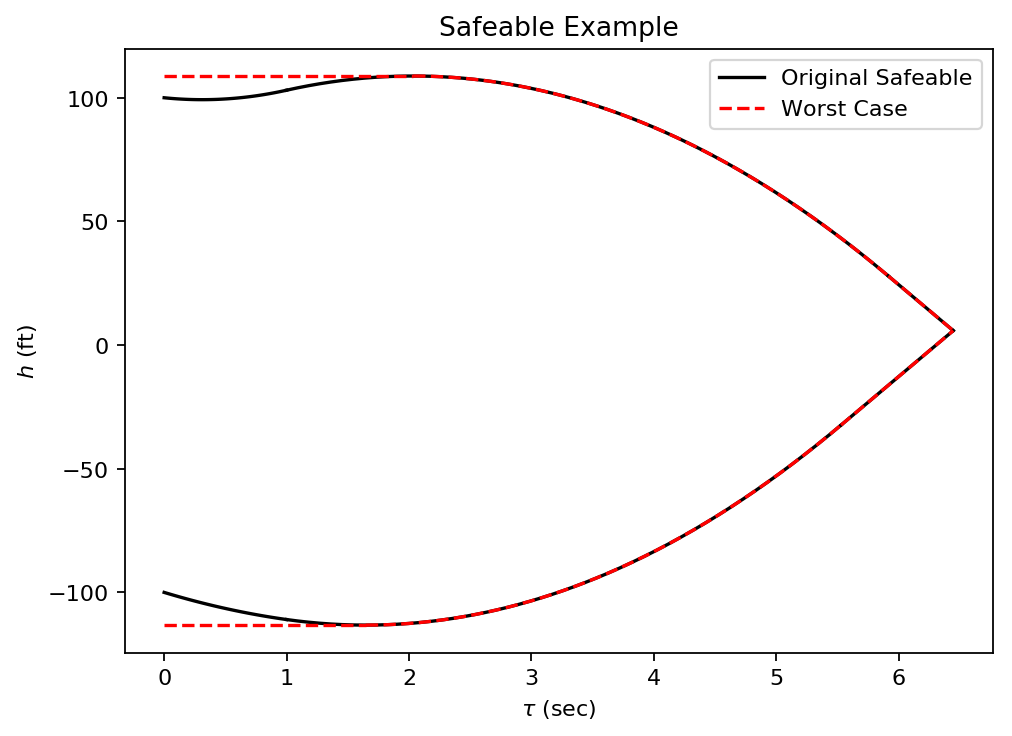

In [5]:
# This shows that you can turn off the trajectories, add labels, and draw the legend
trajMin,trajMax,boundMin,boundMax = getSafeable(advisory,v,worstCase=False)
ax = plotBounds(boundMin,boundMax,trajMin,trajMax,withTraj=False,c='k',name="Safeable Example", label="Original Safeable")

trajMin,trajMax,boundMin,boundMax = getSafeable(advisory,v,worstCase=True)  # worstCase is true by default
plotBounds(boundMin,boundMax,trajMin,trajMax,axes = ax, withTraj=False, c='r--', name="Safeable Example", label="Worst Case")
ax.legend()

### Plot all Safeable regions on one axes

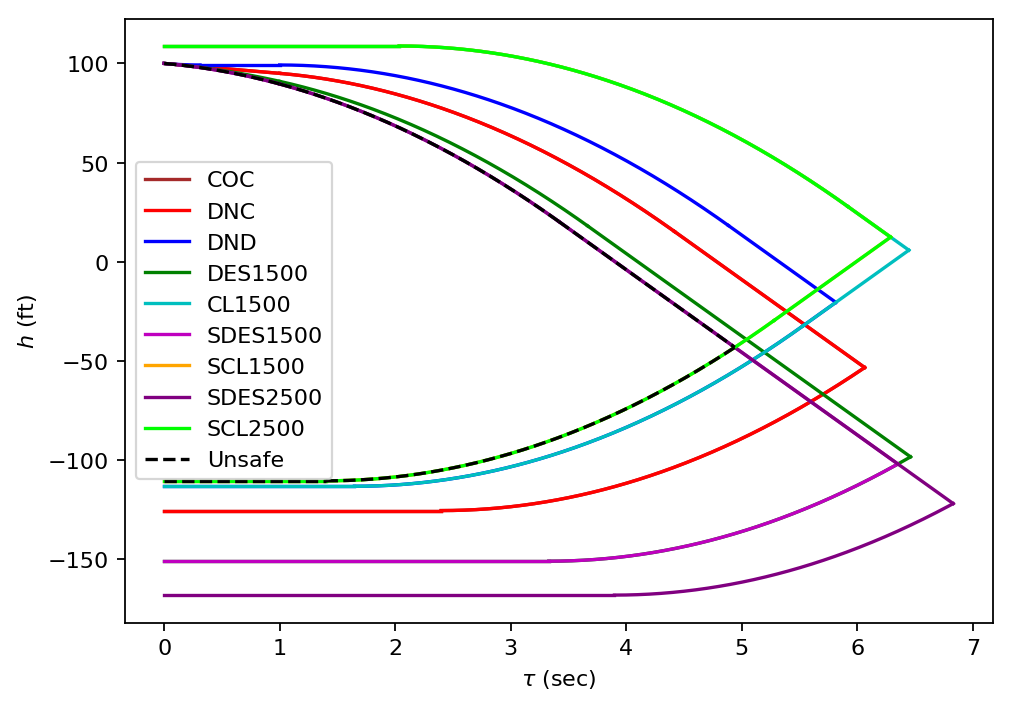

In [6]:
plotUnsafe = True # Set to true if you also want to show the unsafe-for-all region
plotAll(pra,v,plotUnsafe=plotUnsafe)

### Plot safeable advisory and the unsafe-for-all region

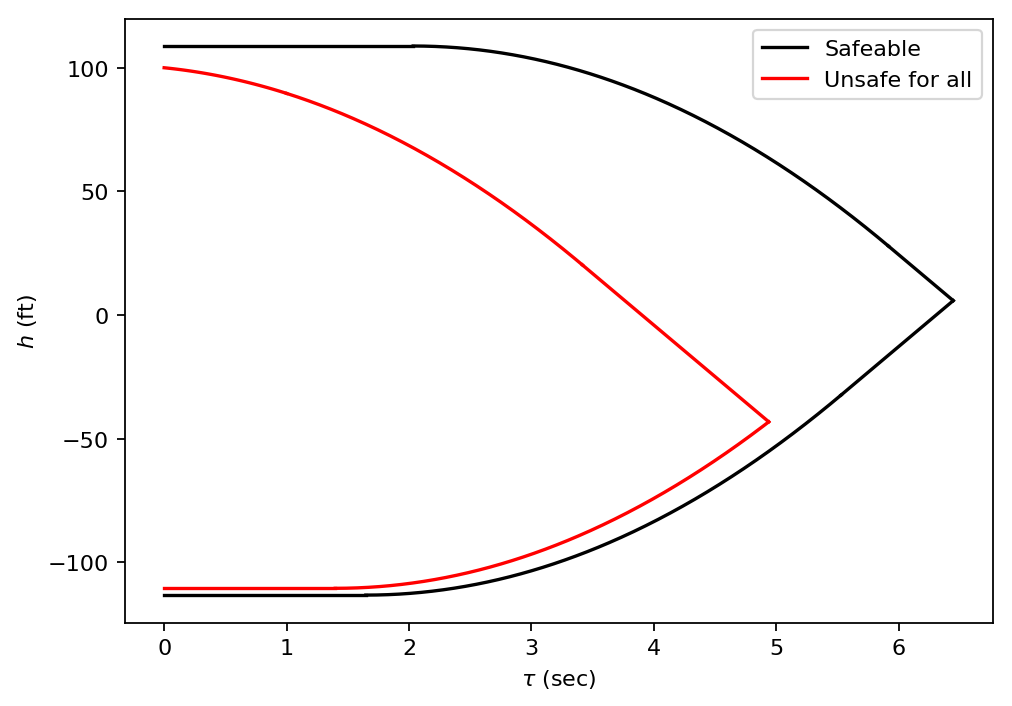

In [7]:
_,_,boundMin,boundMax = getSafeable(advisory,v,worstCase=True)  # worstCase is true by default
axes=plotBounds(boundMin,boundMax,name="Safeable Example", label="Safeable")

boundMin,boundMax = getUnsafeRegion(pra,v,pd,eps)
axes = plotBounds(boundMin,boundMax,axes=axes,c='r',label='Unsafe for all')
axes.legend()

### Plot unsafeable region

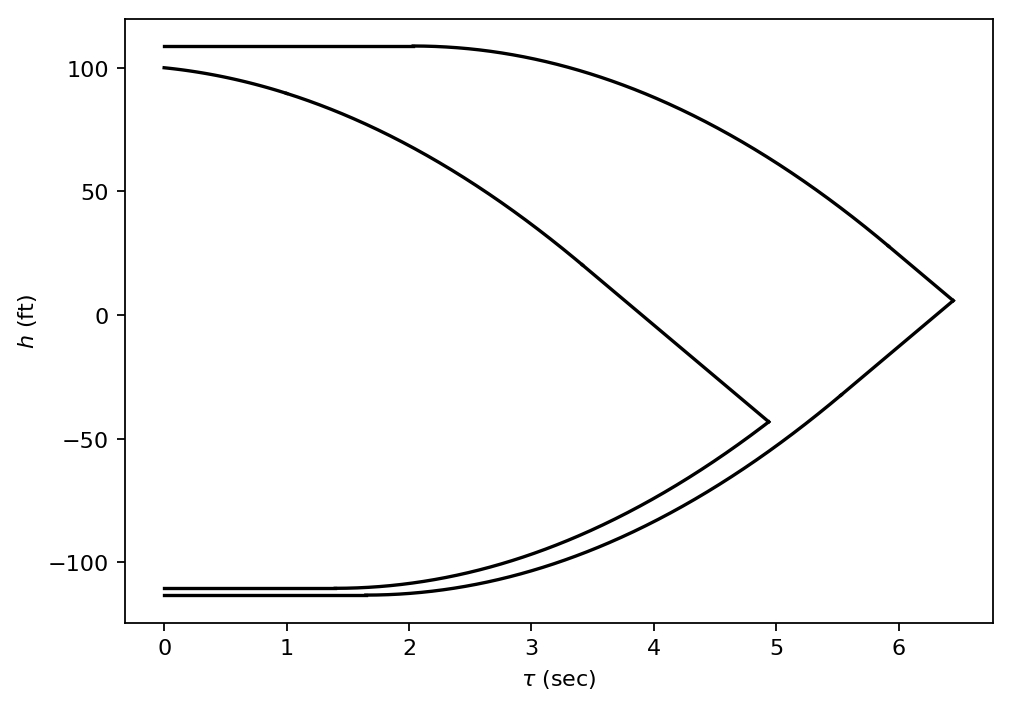

In [8]:
plotGetRegionToCheck(pra,ra,v,pd,eps)

### Plot safeable regions with colors filled

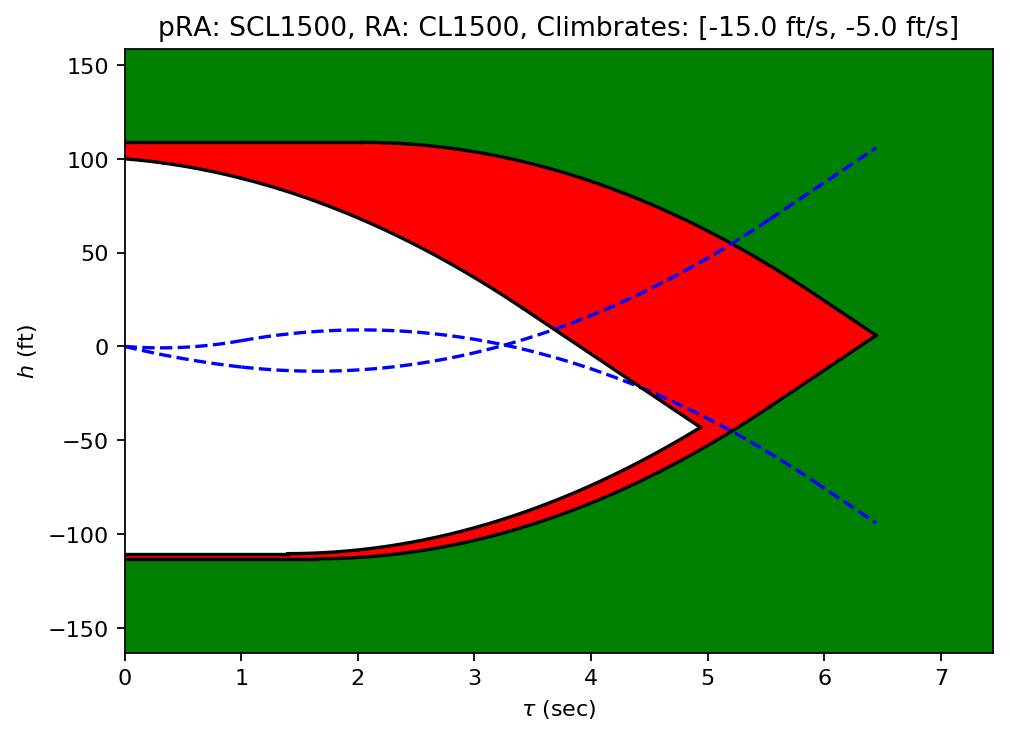

In [9]:
nbin = 350
plotSafeableAdvisory(pra,ra,v,pd,eps,nbin=nbin,withTraj=True)

### Plot under/over approximations of the unsafeable regions

Linearization resolution

* dt: Full length of line segment

* dti: Spacing of linear bounds

dt should always be an integer multiple of dti and **at least twice** dti

In [10]:
dt = 1
dti= 0.0625

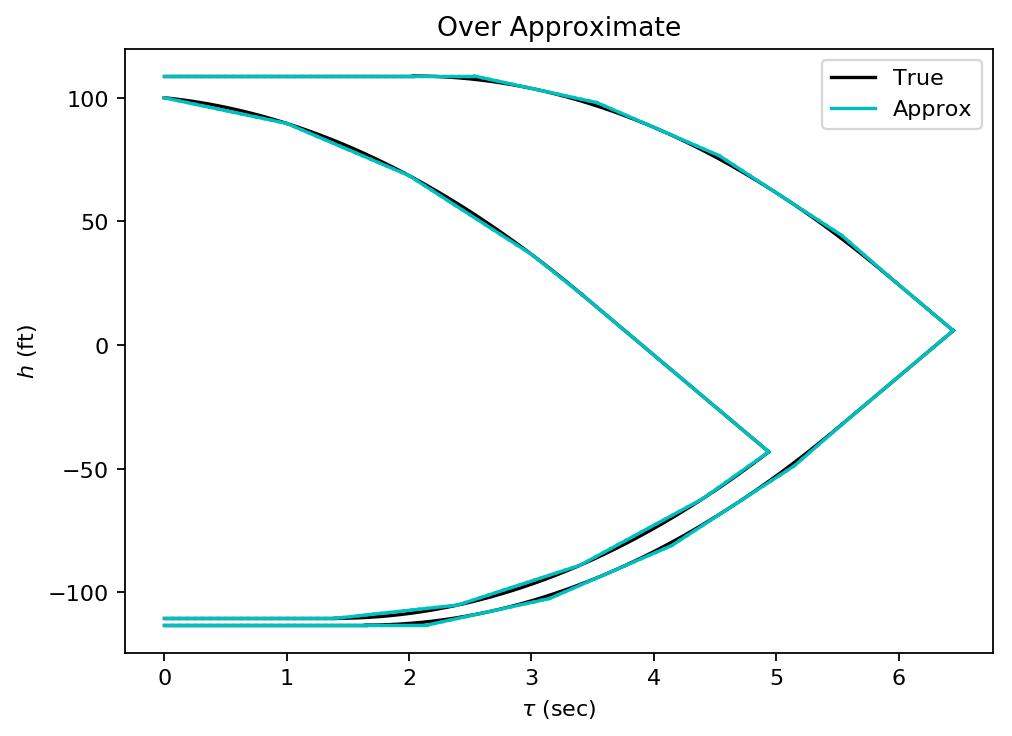

In [11]:
ax = plotGetRegionToCheck(pra,ra,v,pd,eps,label="True")
plotGetRegionToCheck(pra,ra,v,pd,eps,c='c',axes=ax,name="Over Approximate",label="Approx",approx=True,overApprox=True,dt=dt,dti=dti)
ax.legend()

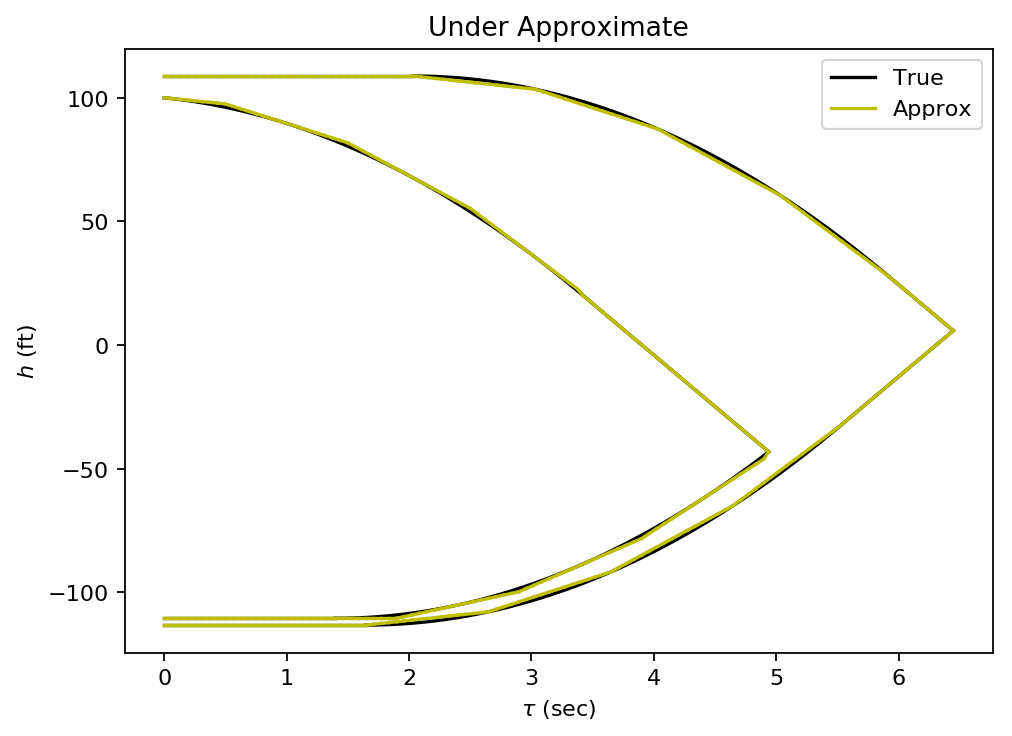

In [12]:
ax = plotGetRegionToCheck(pra,ra,v,pd,eps,label="True")
plotGetRegionToCheck(pra,ra,v,pd,eps,label="Approx",c='y',axes=ax,name="Under Approximate",approx=True,overApprox=False,dt=1.0,dti=0.0625)
ax.legend()

### Plot policy with unsafeable region

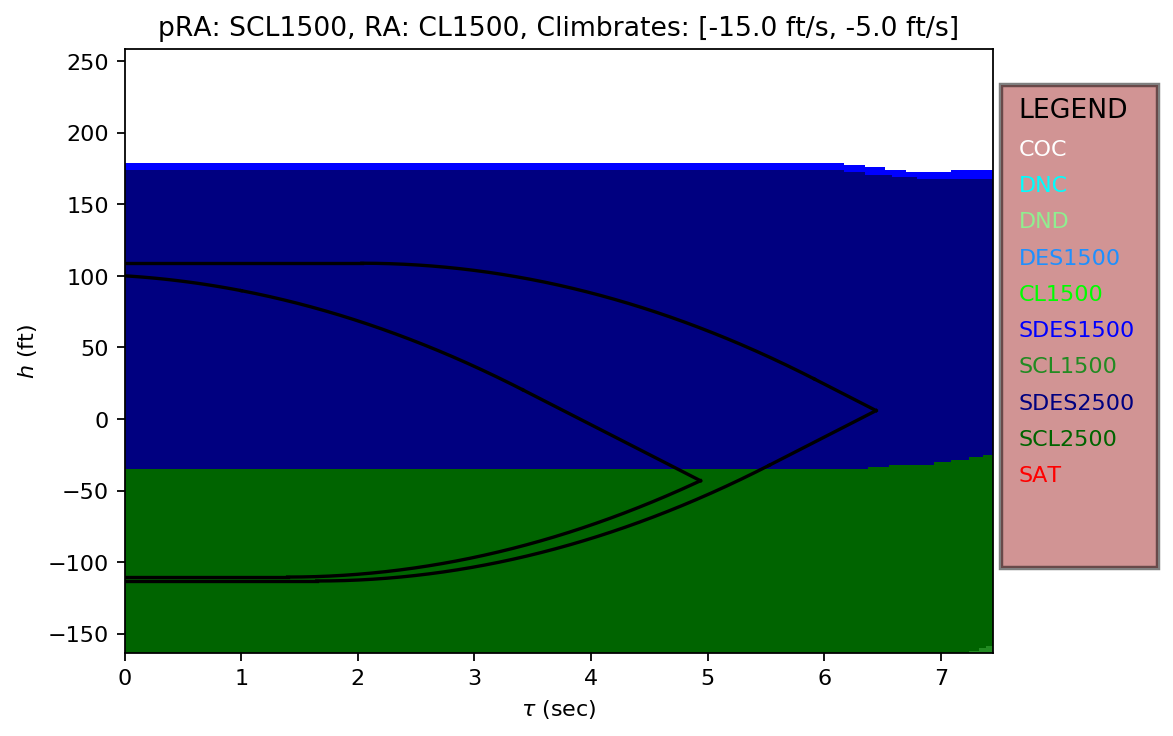

In [13]:
plotSafeablePolicy(pra,ra,v,pd,eps,useTable=False)

### How to save to tikz for use in LaTex

Adding the tikz_save command after any of these plots will save the plot to a tex plot.

Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


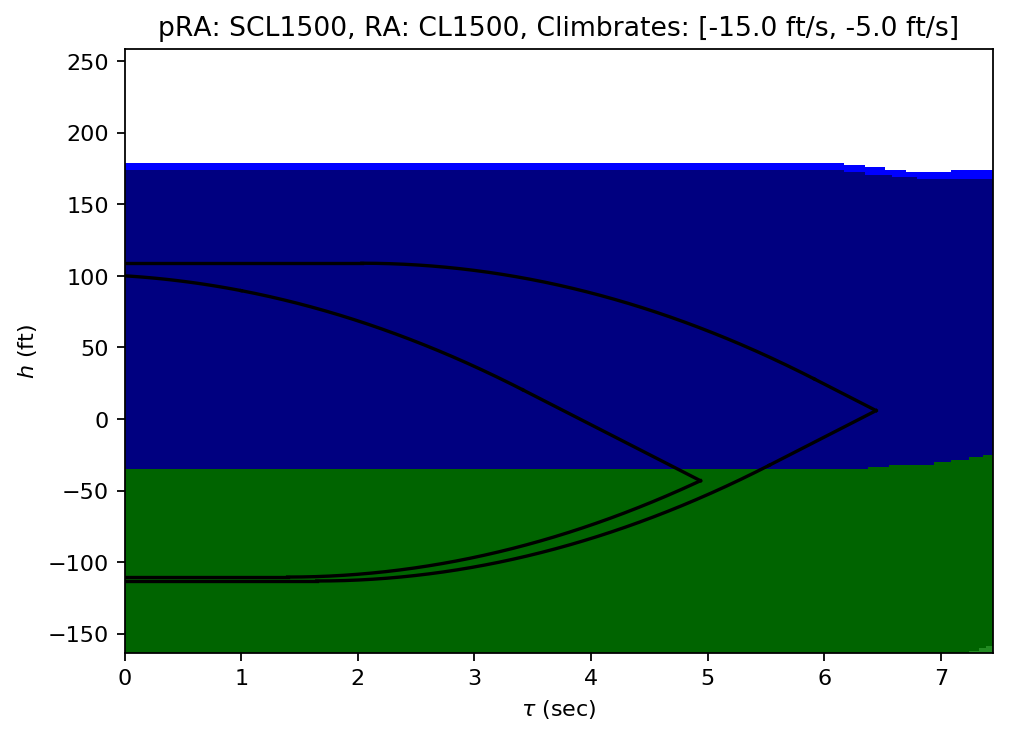

In [14]:
plotSafeablePolicy(pra,ra,v,pd,eps,useTable=False,drawLegend=False,)
tikz_save("Pics/SafeableExample.tex")